<a href="https://colab.research.google.com/github/naotoo1/Stock-Price-Prediction-with-Statsmodel/blob/main/Google_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

**Load dataset**

In [2]:
df_train = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')
df_train = df_train.iloc[:,:3].drop(columns='Open')
df_test = df_test.iloc[:,:3].drop(columns='Open')
df_ds =pd.concat((df_train,df_test),axis=0)


**Check for null Values**

In [3]:
df_ds.isnull().sum()

Date    0
High    0
dtype: int64

**Drop any null values**

In [4]:
df_ds.dropna(axis=0,inplace=True)

**Summary info on data set**

In [5]:
df_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1278 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1278 non-null   object 
 1   High    1278 non-null   float64
dtypes: float64(1), object(1)
memory usage: 30.0+ KB


**Convert to datetime**

In [6]:
# df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_ds['Date'] = pd.to_datetime(df_ds['Date'])


**Index date**

In [7]:
# df_airline.set_index('Month',inplace=True)
df_ds.set_index('Date',inplace=True)

**Visualize data**

Text(0, 0.5, 'Stock Price')

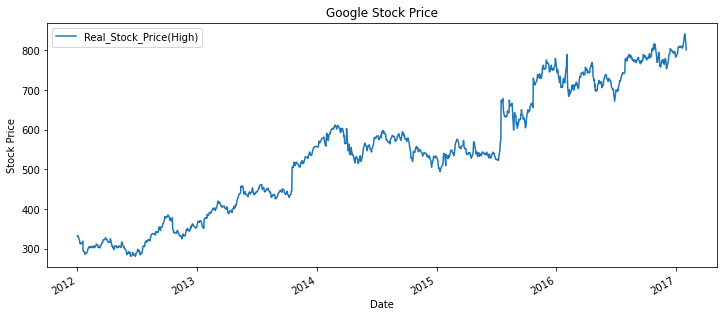

In [8]:
df_ds.rename(columns={'High':'Real_Stock_Price(High)'},inplace=True)
df_ds.plot(figsize=(12,5))
plt.title('Google Stock Price')
plt.ylabel('Stock Price')

**Import test statistic for statistical inference on stationarity**

In [9]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Function to determine Stationarity**


In [10]:
def addfuller(x):
  results = adfuller(x)
  print('ADS: {}'.format(results[0]))
  print('p-value: {}'.format(results[1]))
  if results[1]<= 0.05:
    print('strong evidence against alt hypothesis. we fail to reject the null hypothesis. The data has no unit root and is stationary')
  else:
    print('weak evidence against the null hypothesis. we reject the null hypothesis. The data has a unit root and is not stationary')


**Test for Stationarity**

In [11]:
addfuller(df_ds['Real_Stock_Price(High)'])

ADS: -0.605779435108011
p-value: 0.869670756312162
weak evidence against the null hypothesis. we reject the null hypothesis. The data has a unit root and is not stationary


**First Difference**

In [12]:
df_ds['First difference'] = df_ds['Real_Stock_Price(High)'] - df_ds['Real_Stock_Price(High)'].shift(1)

**Second Difference**

In [13]:
df_ds['Second difference'] = df_ds['First difference']-df_ds['First difference'].shift(1)

**N difference**

In [14]:
df_ds['30 difference']= df_ds['Real_Stock_Price(High)']-df_ds['Real_Stock_Price(High)'].shift(30)

**Summary of N difference**

In [15]:
df_ds.head()


,Real_Stock_Price(High),First difference,Second difference,30 difference
Date,,,,
2012-01-03,332.83,NaN,NaN,NaN
2012-01-04,333.87,1.04,NaN,NaN
2012-01-05,330.75,-3.12,-4.16,NaN
2012-01-06,328.77,-1.98,1.14,NaN
2012-01-09,322.29,-6.48,-4.50,NaN


**Test for stationarity on first difference**

In [16]:
# addfuller(df_airline['First difference'].dropna())
addfuller(df_ds['First difference'].dropna())

ADS: -19.04471114800054
p-value: 0.0
strong evidence against alt hypothesis. we fail to reject the null hypothesis. The data has no unit root and is stationary


**Test for stationarity on Second difference**

In [17]:
addfuller(df_ds['Second difference'].dropna())

ADS: -15.394224664224806
p-value: 3.2791405066321485e-28
strong evidence against alt hypothesis. we fail to reject the null hypothesis. The data has no unit root and is stationary


**Test for Stationarity for n difference**

In [18]:
addfuller(df_ds['30 difference'].dropna())

ADS: -7.498745838156927
p-value: 4.309484058881476e-11
strong evidence against alt hypothesis. we fail to reject the null hypothesis. The data has no unit root and is stationary


**Visualize results for stationarity on the data set**

Text(0, 0.5, 'Normalized Stock Price')

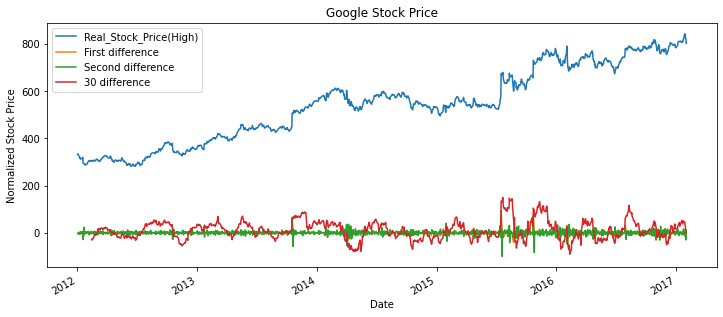

In [19]:
df_ds.plot(figsize=(12,5))
plt.title('Google Stock Price')
plt.ylabel('Normalized Stock Price')

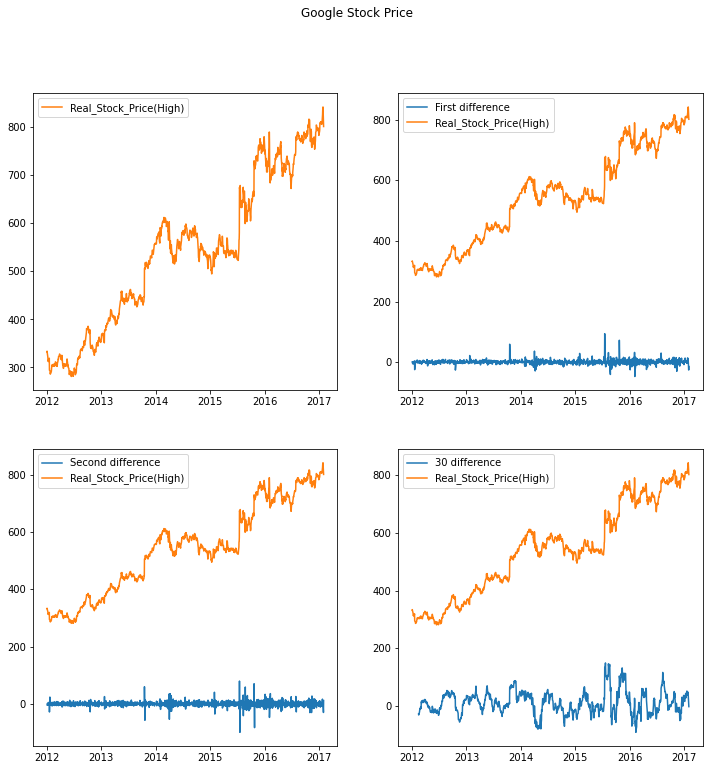

In [20]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2, 2,figsize=(12,12))
fig.suptitle('Google Stock Price')
ax1.plot(df_ds['Real_Stock_Price(High)'],color='C1',label='Real_Stock_Price(High)')
ax1.legend()
ax2.plot(df_ds[['First difference','Real_Stock_Price(High)']])
ax2.legend(['First difference','Real_Stock_Price(High)'])
ax3.plot(df_ds[['Second difference','Real_Stock_Price(High)']])
ax3.legend(['Second difference','Real_Stock_Price(High)'])
ax4.plot(df_ds[['30 difference','Real_Stock_Price(High)']])
ax4.legend(['30 difference','Real_Stock_Price(High)'])




**Prepare Train and Test data**

In [21]:
from datetime import datetime,timedelta

In [22]:
train_data_end = datetime(2016,12,30)
test_data_end = datetime(2017,1,31)
train_data = df_ds[:train_data_end]
test_data = df_ds[train_data_end+timedelta(1): test_data_end]

**plot acf and pacf**



In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

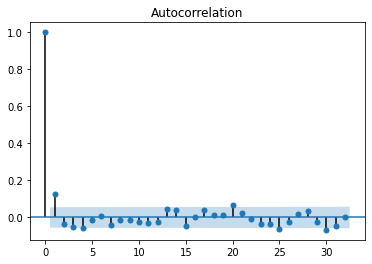

In [24]:
acf=plot_acf(df_ds['First difference'].dropna())

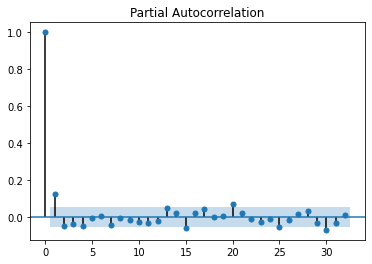

In [25]:
pacf = plot_pacf(df_ds['First difference'].dropna())

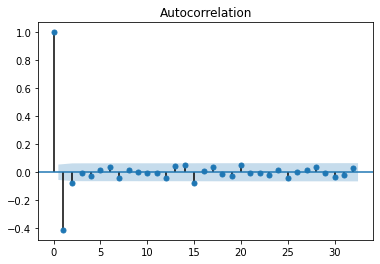

In [26]:
acf=plot_acf(df_ds['Second difference'].dropna())

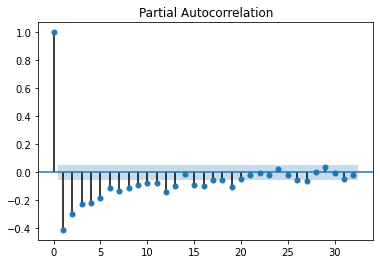

In [27]:
pacf = plot_pacf(df_ds['Second difference'].dropna())

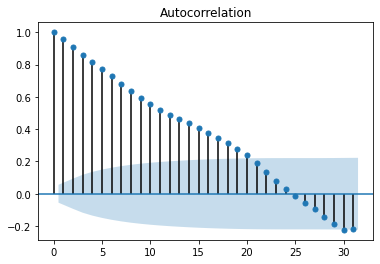

In [28]:
acf1=plot_acf(df_ds['30 difference'].dropna())

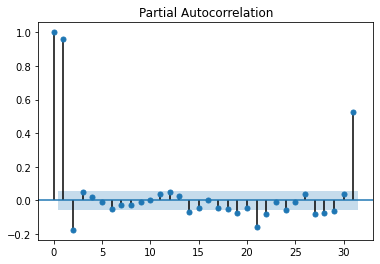

In [29]:
pacf1=plot_pacf(df_ds['30 difference'].dropna())

**Initialize model**

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model_Sarima=SARIMAX(train_data['Real_Stock_Price(High)'].dropna(),order=(2,0,20),seasonal_order=(0,1,0,30))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


**Fitting the model**

In [32]:
model_Sarima_fit = model_Sarima.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


**model summary**

In [33]:
model_Sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  Statespace Model Results                                 
===========================================================================================
Dep. Variable:              Real_Stock_Price(High)   No. Observations:                 1258
Model:             SARIMAX(2, 0, 20)x(0, 1, 0, 30)   Log Likelihood               -4568.246
Date:                             Tue, 17 May 2022   AIC                           9182.491
Time:                                     00:26:03   BIC                           9300.094
Sample:                                          0   HQIC                          9226.741
                                            - 1258                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8914      0.152      5.856      0.000       0.593       1.190
ar.L2          0.0075      0.143      0.052      0.958      -0.274       0.289
ma.L1          0.1976      0.153      1.288      0.198      -0.103       0.498
ma.L2          0.0203      0.036      0.568      0.570      -0.050       0.090
ma.L3         -0.0441      0.025     -1.773      0.076      -0.093       0.005
ma.L4         -0.0156      0.027     -0.579      0.562      -0.068       0.037
ma.L5          0.0834      0.026      3.233      0.001       0.033       0.134
ma.L6          0.0570      0.029      1.935      0.053      -0.001       0.115
ma.L7         -0.0111      0.023     -0.492      0.623      -0.056       0.033
ma.L8         -0.0504      0.024     -2.108      0.035      -0.097      -0.004
ma.L9         -0.0028      0.028     -0.100      0.920      -0.057       0.052
ma.L10         0.2215      0.020     11.054      0.000       0.182       0.261
ma.L11        -0.0467      0.035     -1.346      0.178      -0.115       0.021
ma.L12         0.3393      0.021     16.372      0.000       0.299       0.380
ma.L13         0.2628      0.058      4.517      0.000       0.149       0.377
ma.L14         0.1257      0.045      2.777      0.005       0.037       0.214
ma.L15        -0.2583      0.029     -8.819      0.000      -0.316      -0.201
ma.L16         0.0199      0.051      0.387      0.698      -0.081       0.121
ma.L17         0.2831      0.024     11.929      0.000       0.237       0.330
ma.L18         0.4670      0.050      9.342      0.000       0.369       0.565
ma.L19         0.0181      0.074      0.244      0.807      -0.127       0.163
ma.L20         0.1804      0.030      5.985      0.000       0.121       0.240
sigma2       101.4672      2.168     46.806      0.000      97.218     105.716
===================================================================================
Ljung-Box (Q):                      233.61   Jarque-Bera (JB):              6637.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               5.55   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Predict test data**

In [34]:
pred1 = model_Sarima_fit.predict(start=train_data.shape[0],end=(train_data.shape[0]+test_data.shape[0]-1), dynamic=False)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


**Real test data**

In [35]:
test_data_list=np.array([i for i in df_test['High']])
test_data_list

array([789.63, 791.34, 794.48, 807.9 , 809.97, 809.13, 808.15, 807.39,
       811.22, 807.14, 806.21, 809.48, 806.91, 820.87, 825.9 , 835.77,
       838.  , 841.95, 815.84, 801.25])

**Prediction with the test data**

In [36]:
pred1_list= np.array([i for i in pred1])
pred1_list

array([789.17552105, 799.14253583, 802.11445017, 808.24458038,
       809.88394811, 808.28469616, 818.46134627, 811.46422241,
       813.40493598, 801.3560091 , 786.52393166, 775.57684682,
       778.03719713, 786.14119464, 796.48692145, 797.32593267,
       798.05227351, 810.02460487, 807.02874542, 806.42832918])

**Residuals**

In [38]:
residuals=test_data_list - pred1_list
residuals

array([  0.45447895,  -7.80253583,  -7.63445017,  -0.34458038,
         0.08605189,   0.84530384, -10.31134627,  -4.07422241,
        -2.18493598,   5.7839909 ,  19.68606834,  33.90315318,
        28.87280287,  34.72880536,  29.41307855,  38.44406733,
        39.94772649,  31.92539513,   8.81125458,  -5.17832918])

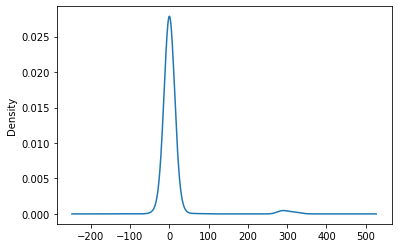

In [39]:
model_Sarima_fit.resid.plot(kind='kde')

In [40]:
test_data['Pred Sarima']=pred1_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


**Visualize Predicted results**

Text(0, 0.5, 'Google Stock Price')

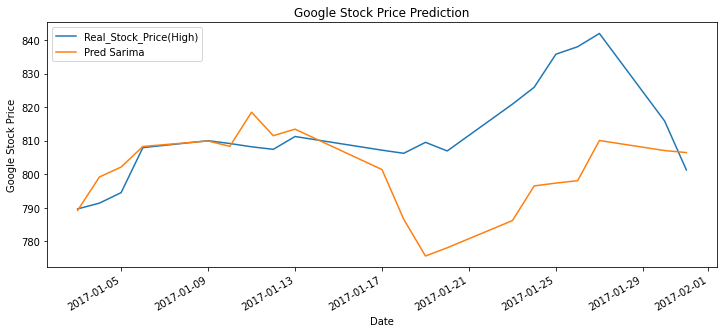

In [41]:
test_data[['Real_Stock_Price(High)','Pred Sarima']].plot(figsize=(12,5))
plt.title('Google Stock Price Prediction')
plt.ylabel('Google Stock Price')
